# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
#/home/amhamor/CarND/CarND-Traffic-Sign-Classifier-Project/
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file =  "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

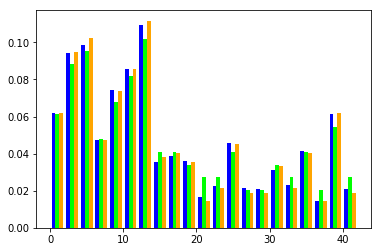

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def create_and_plot_histogram(class_data_list):
    figure = plt.figure()
    weights = [np.zeros_like(class_data) + 1 / len(class_data) for class_data in class_data_list]
    histogram = plt.hist(x=class_data_list, bins=42//2, weights=weights, color=['blue', 'lime', 'orange'])
    plt.show(histogram)
    
create_and_plot_histogram([y_train, y_valid, y_test])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from skimage import exposure

def flatten_array(array):
    return array.flatten()

def gamma_correct(image):
    return exposure.adjust_gamma(image, .50)

def convert_to_grayscale(image):
    grayscale_image = np.dot(image, [0.2989, 0.5870, 0.1140])
    return np.expand_dims(grayscale_image, 3)

def normalize_pixel_values(pixel_array_flattened, pixel_array):
    maximum_pixel_value = max(pixel_array_flattened)
    minimum_pixel_value = min(pixel_array_flattened)
    return (pixel_array - minimum_pixel_value) / (maximum_pixel_value - minimum_pixel_value)

def standardize_pixel_values(pixel_array_flattened, pixel_array):
    mean_pixel_value = np.mean(pixel_array_flattened)
    stddev_pixel_value = np.std(pixel_array_flattened)
    return (pixel_array - mean_pixel_value) / stddev_pixel_value

#X_train_grayscale = convert_to_grayscale(X_train)
#X_valid_grayscale = convert_to_grayscale(X_valid)

X_train_flattened = flatten_array(array=X_train)
X_valid_flattened = flatten_array(array=X_valid)
X_test_flattened = flatten_array(array=X_test)

#X_train_normalized = normalize_pixel_values(pixel_array_flattened=X_train_flattened, pixel_array=X_train)
#X_valid_normalized = normalize_pixel_values(pixel_array_flattened=X_valid_flattened, pixel_array=X_valid)
#X_test_normalized = normalize_pixel_values(pixel_array_flattened=X_test_flattened, pixel_array = X_test)

X_train_standardized = standardize_pixel_values(pixel_array_flattened=X_train_flattened, pixel_array=X_train)
X_valid_standardized = standardize_pixel_values(pixel_array_flattened=X_valid_flattened, pixel_array=X_valid)
X_test_standardized = standardize_pixel_values(pixel_array_flattened=X_test_flattened, pixel_array=X_test)

#X_train_grayscale = convert_to_grayscale(X_train)
#X_valid_grayscale = convert_to_grayscale(X_valid)
#X_test_grayscale = convert_to_grayscale(X_test)

#X_train_standardized_grayscale = convert_to_grayscale(X_train_standardized)
#X_valid_standardized_grayscale = convert_to_grayscale(X_valid_standardized)
#X_test_standardize_grayscale = convert_to_grayscale(X_test_standardized)

#X_train_gamma_corrected_flattened = gamma_correct(X_train_flattened)
#X_valid_gamma_corrected_flattened = gamma_correct(X_valid_flattened)
#X_test_gamma_corrected_flattened = gamma_correct(X_test_flattened)

#X_train_gamma_corrected = gamma_correct(X_train)
#X_valid_gamma_corrected = gamma_correct(X_valid)
#X_test_gamma_corrected = gamma_correct(X_test)

#X_train_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_train_gamma_corrected_flattened, 
#                                                                pixel_array=X_train_gamma_corrected)
#X_valid_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_valid_gamma_corrected_flattened, 
#                                                                pixel_array=X_valid_gamma_corrected)
#X_test_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_test_gamma_corrected_flattened, 
#                                                                pixel_array=X_test_gamma_corrected)

In [6]:
image_index = 0

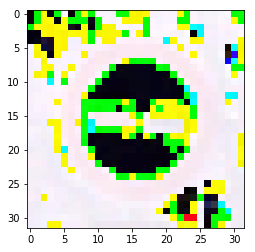

In [7]:
plt.imshow(X_train_standardized[image_index])

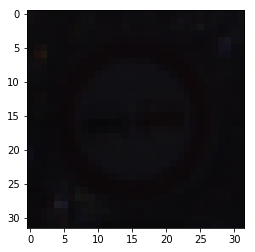

In [8]:
#plt.imshow(X_train_gamma_corrected[image_index])
#plt.imshow(X_train_standardized_grayscale.reshape(X_train_standardized_grayscale.shape[:3])[image_index], cmap='gray')
plt.imshow(X_train[image_index, :, ::-1])
image_index += 1

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def traffic_sign_classifier(input_data):
    weights1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], stddev=1.), dtype=tf.float32, name='weights1')
    bias1 = tf.Variable(tf.zeros_like([6], dtype=tf.float32), name='bias1')
    conv_layer1 = tf.nn.conv2d(input=input_data, filter=weights1, strides=(1, 1, 1, 1), padding='VALID') + bias1
    conv_layer1 = tf.nn.max_pool(value=conv_layer1, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME')
    #conv_layer1 = tf.nn.dropout(x=conv_layer1, keep_prob=0.75)
    conv_layer1 = tf.nn.relu(features=conv_layer1)
    
    weights2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev=1.), dtype=tf.float32, name='weights2')
    bias2 = tf.Variable(tf.zeros_like([16], dtype=tf.float32), name='bias2')
    conv_layer2 = tf.nn.conv2d(input=conv_layer1, filter=weights2, strides=(1, 1, 1, 1), padding='VALID') + bias2
    conv_layer2 = tf.nn.max_pool(value=conv_layer2, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME')
    #conv_layer2 = tf.nn.dropout(x=conv_layer2, keep_prob=0.75)
    conv_layer2 = tf.nn.relu(features=conv_layer2)
    
    weights3 = tf.Variable(tf.truncated_normal([400, 120], stddev=1.), name='weights3')
    bias3 = tf.Variable(tf.zeros_like([120], dtype=tf.float32), name='bias3')
    fully_connected_layer1 = tf.add(tf.matmul(tf.contrib.layers.flatten(inputs=conv_layer2), weights3), bias3)
    #fully_connected_layer1 = tf.nn.relu(features=fully_connected_layer1)
    
    weights4 = tf.Variable(tf.truncated_normal([120, 84], stddev=1.), name='weights4')
    bias4 = tf.Variable(tf.zeros_like([84], dtype=tf.float32), name='bias4')
    fully_connected_layer2 = tf.add(tf.matmul(fully_connected_layer1, weights4), bias4)
    #fully_connected_layer2 = tf.nn.relu(features=fully_connected_layer2)
    
    weights5 = tf.Variable(tf.truncated_normal([84, 43], stddev=1.), name='weights5')
    bias5 = tf.Variable(tf.zeros_like([43], dtype=tf.float32), name='bias5')
    logits = tf.add(tf.matmul(fully_connected_layer2, weights5), bias5)
    
    return logits
    #return (weights1, weights2, weights3, weights4, weights5, bias5, logits)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
epochs = 10000
batch_size = 64
learning_rate = .001

input_data = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3], name='input_data')
labels = tf.placeholder(dtype=tf.int32, shape=[None], name='labels')
labels_one_hot_encoded = tf.one_hot(indices=labels, depth=n_classes)

#weights1, weights2, weights3, weights4, weights5, bias5, logits = traffic_sign_classifier(input_data=input_data)
logits = traffic_sign_classifier(input_data=input_data)
cost = tf.nn.softmax_cross_entropy_with_logits(labels=labels_one_hot_encoded, logits=logits)
mean_cost = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_one_hot_encoded, 1))
accuracy_mean = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate_accuracy(X_data, y_data, sess):
    X_data_number = len(X_data)
    total_accuracy = 0
    for batch_start_index in range(0, X_data_number, batch_size):
        batch_end_index = batch_start_index + batch_size if batch_start_index + batch_size <= X_data_number else None
        
        input_batch = X_data[batch_start_index:batch_end_index]
        labels_batch = y_data[batch_start_index:batch_end_index]
        
        accuracy = sess.run(accuracy_mean, feed_dict={input_data: input_batch, labels: labels_batch})
        total_accuracy += accuracy * len(input_batch)
        
    return total_accuracy / X_data_number

In [11]:
def train_model(X_train_data=X_train_standardized, y_train_data=y_train):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #saver.restore(sess, "./traffic-sign-classifier-parameters")

        for epoch in range(0, epochs):
            X_train_data, y_train_data = shuffle(X_train_data, y_train_data)

            total_accuracy = 0
            for batch_start_index in range(0, n_train, batch_size):
                batch_end_index = batch_start_index + batch_size if batch_start_index + batch_size <= n_train else -1

                input_batch = X_train_data[batch_start_index:batch_end_index]
                labels_batch = y_train_data[batch_start_index:batch_end_index]
                
                #if epoch == 0 or epoch % 50 != 0:
                    #batch_index = np.random.randint(batch_size)
                sess.run(optimizer, feed_dict={input_data: input_batch, labels: labels_batch})
                #if epoch % 100 == 0 and epoch != 0:
                    #sess.run(optimizer, feed_dict={input_data: input_batch[batch_index:batch_index+1, :, ::-1], labels: labels_batch[batch_index:batch_index+1]})
                
                accuracy = sess.run(accuracy_mean, feed_dict={input_data: input_batch, labels: labels_batch})
                total_accuracy += accuracy * len(input_batch)
            total_accuracy /= n_train
                
            valid_accuracy = evaluate_accuracy(X_data=X_valid_standardized, y_data=y_valid, sess=sess)
                
            print('Epoch {}:'.format(epoch+1))
            #print('logits: {}'.format(sess.run(logits[0], feed_dict={input_data: X_train_data, labels: y_train})))
            print("Training accuracy = {}".format(total_accuracy))
            print('Validation accuracy = {}'.format(valid_accuracy))
        
            #if epoch % 10 == 0:
                #save_directory = 'traffic-sign-classifier-parameters'
                #saver.save(sess, save_directory)
                #print('Session saved at {}'.format(save_directory))
                
train_model()

Epoch 1:
Training accuracy = 0.2669329578504675
Validation accuracy = 0.357596371828023
Session saved at traffic-sign-classifier-parameters
Epoch 2:
Training accuracy = 0.5429178999328022
Validation accuracy = 0.5145124720067394
Epoch 3:
Training accuracy = 0.6629213483385863
Validation accuracy = 0.5845804990284027
Epoch 4:
Training accuracy = 0.7344176556626326
Validation accuracy = 0.6403628118589622
Epoch 5:
Training accuracy = 0.7824362769079344
Validation accuracy = 0.6691609978000053
Epoch 6:
Training accuracy = 0.8180407482733852
Validation accuracy = 0.706802721439846
Epoch 7:
Training accuracy = 0.8462599499608809
Validation accuracy = 0.720634920607889
Epoch 8:
Training accuracy = 0.8689042788483109
Validation accuracy = 0.7412698412428097
Epoch 9:
Training accuracy = 0.8846518577469187
Validation accuracy = 0.7535147390127722
Epoch 10:
Training accuracy = 0.8994511336087324
Validation accuracy = 0.7675736967938828
Epoch 11:
Training accuracy = 0.9105721428057302
Validation 

Epoch 88:
Training accuracy = 0.99732750941119
Validation accuracy = 0.8911564627742551
Epoch 89:
Training accuracy = 0.9978735021121297
Validation accuracy = 0.8986394556741866
Epoch 90:
Training accuracy = 0.9985919135607345
Validation accuracy = 0.8986394558634077
Epoch 91:
Training accuracy = 0.9965228885887526
Validation accuracy = 0.903401361111881
Session saved at traffic-sign-classifier-parameters
Epoch 92:
Training accuracy = 0.9981608666915716
Validation accuracy = 0.8947845804853504
Epoch 93:
Training accuracy = 0.9972987729532458
Validation accuracy = 0.8961451244192059
Epoch 94:
Training accuracy = 0.9976148739906319
Validation accuracy = 0.8895691607949956
Epoch 95:
Training accuracy = 0.9972413000373574
Validation accuracy = 0.8988662129491906
Epoch 96:
Training accuracy = 0.9974711917009109
Validation accuracy = 0.886167800439999
Epoch 97:
Training accuracy = 0.9975861375326878
Validation accuracy = 0.9031746028772557
Epoch 98:
Training accuracy = 0.9985631771027903
Val

Epoch 174:
Training accuracy = 0.9989367510560648
Validation accuracy = 0.9129251704464694
Epoch 175:
Training accuracy = 0.9993965343831719
Validation accuracy = 0.9160997736210725
Epoch 176:
Training accuracy = 0.9995114802149487
Validation accuracy = 0.9077097507425987
Epoch 177:
Training accuracy = 0.9987355958504555
Validation accuracy = 0.9006802722980646
Epoch 178:
Training accuracy = 0.9991379062616742
Validation accuracy = 0.9047619052349575
Epoch 179:
Training accuracy = 0.9994252708411161
Validation accuracy = 0.9088435376987977
Epoch 180:
Training accuracy = 0.9981608666915716
Validation accuracy = 0.9065759640026525
Epoch 181:
Training accuracy = 0.998965487514009
Validation accuracy = 0.9054421765734009
Session saved at traffic-sign-classifier-parameters
Epoch 182:
Training accuracy = 0.999540216672893
Validation accuracy = 0.9133786851856984
Epoch 183:
Training accuracy = 0.9991379062616742
Validation accuracy = 0.9088435376987977
Epoch 184:
Training accuracy = 0.9997701

Epoch 260:
Training accuracy = 0.9993103250093394
Validation accuracy = 0.9208616781937562
Epoch 261:
Training accuracy = 0.9991953791775626
Validation accuracy = 0.9242630388325844
Session saved at traffic-sign-classifier-parameters
Epoch 262:
Training accuracy = 0.9998850541682233
Validation accuracy = 0.923582766723741
Epoch 263:
Training accuracy = 0.9997701083364464
Validation accuracy = 0.9133786851856984
Epoch 264:
Training accuracy = 0.999540216672893
Validation accuracy = 0.9145124721283815
Epoch 265:
Training accuracy = 0.99910916980373
Validation accuracy = 0.9206349207295312
Epoch 266:
Training accuracy = 0.9992815885513952
Validation accuracy = 0.9181405900422137
Epoch 267:
Training accuracy = 0.9993965343831719
Validation accuracy = 0.92607709769489
Epoch 268:
Training accuracy = 0.9996838989626139
Validation accuracy = 0.9136054424607024
Epoch 269:
Training accuracy = 0.9988792781401764
Validation accuracy = 0.9183673471279966
Epoch 270:
Training accuracy = 0.99956895313

Epoch 346:
Training accuracy = 0.9996838989626139
Validation accuracy = 0.9306122450871803
Epoch 347:
Training accuracy = 0.9994252708411161
Validation accuracy = 0.9204081633599167
Epoch 348:
Training accuracy = 0.9996838989626139
Validation accuracy = 0.9190476194260613
Epoch 349:
Training accuracy = 0.9998850541682233
Validation accuracy = 0.9092970524380266
Epoch 350:
Training accuracy = 0.9994252708411161
Validation accuracy = 0.9179138323887676
Epoch 351:
Training accuracy = 0.9993677979252278
Validation accuracy = 0.9208616781937562
Session saved at traffic-sign-classifier-parameters
Epoch 352:
Training accuracy = 0.9995114802149487
Validation accuracy = 0.9151927441426145
Epoch 353:
Training accuracy = 0.9996264260467255
Validation accuracy = 0.9278911567464166
Epoch 354:
Training accuracy = 0.9994540072990603
Validation accuracy = 0.9181405896637715
Epoch 355:
Training accuracy = 0.9993965343831719
Validation accuracy = 0.9342403631902336
Epoch 356:
Training accuracy = 0.99985

Epoch 432:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 433:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 434:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 435:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 436:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 437:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 438:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 439:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 440:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 441:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Session saved at traffic-sign-classifier-parameters
Epoch 442:
Training accuracy = 0.99997

Epoch 518:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 519:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 520:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 521:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Session saved at traffic-sign-classifier-parameters
Epoch 522:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 523:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 524:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 525:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 526:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 527:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 528:
Training accuracy = 0.99997

Epoch 603:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 604:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 605:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 606:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 607:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 608:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 609:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 610:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 611:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Session saved at traffic-sign-classifier-parameters
Epoch 612:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 613:
Training accuracy = 0.99997

Epoch 689:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 690:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 691:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Session saved at traffic-sign-classifier-parameters
Epoch 692:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 693:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 694:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 695:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 696:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 697:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 698:
Training accuracy = 0.9999712635420558
Validation accuracy = 0.9306122450871803
Epoch 699:
Training accuracy = 0.99997

KeyboardInterrupt: 

In [13]:
with tf.Session() as sess:
    saver.restore(sess, "./traffic-sign-classifier-parameters")
    print(evaluate_accuracy(X_data=X_test, y_data=y_test, sess=sess))

0.886777513884


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

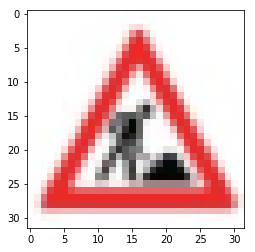

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
from scipy.misc import imresize

image1 = mpimg.imread('roadwork-ahead.png')
image1 = imresize(image1, (32, 32, 3))

image2 = mpimg.imread('go-straight-or-left-german-traffic-sign.png')
image2 = imresize(image2, (32, 32, 3))

image3 = mpimg.imread('roundabout-mandatory-german-traffic-sign.png')
image3 = imresize(image3, (32, 32, 3))

image4 = mpimg.imread('speed-limit-30-km-per-h-german-traffic-sign.png')
image4 = imresize(image4, (32, 32, 3))

image5 = mpimg.imread('yield-german-traffic-sign.png')
image5 = imresize(image5, (32, 32, 3))

plt.imshow(image1)

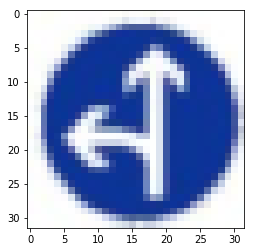

In [15]:
plt.imshow(image2)

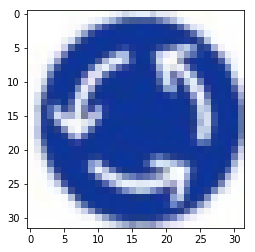

In [16]:
plt.imshow(image3)

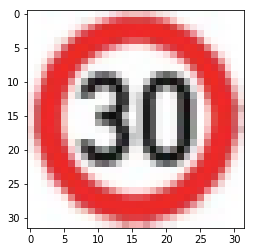

In [17]:
plt.imshow(image4)

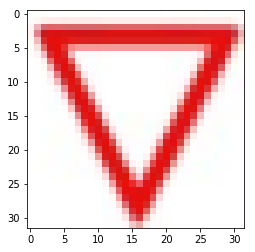

In [18]:
plt.imshow(image5)

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    image1_expanded = np.expand_dims(image1, axis=0)
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Image1 is the roadwork German traffic sign; Image1\'s corresponding class ID is 25. The neural network predicts Image1\'s class ID to be:')
    print(sess.run(tf.argmax(logits, 1), feed_dict={input_data: image1_expanded}))

Image1 is the roadwork German traffic sign; Image1's corresponding class ID is 25. The neural network predicts Image1's class ID to be:
[25]


In [20]:
with tf.Session() as sess:
    image2_expanded = np.expand_dims(image2, axis=0)
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Image2 is the go straight or left German traffic sign; Image2\'s corresponding class ID is 37. The neural network predicts Image1\'s class ID to be:')
    print(sess.run(tf.argmax(logits, 1), feed_dict={input_data: image2_expanded}))

Image2 is the go straight or left German traffic sign; Image2's corresponding class ID is 37. The neural network predicts Image1's class ID to be:
[37]


In [21]:
with tf.Session() as sess:
    image3_expanded = np.expand_dims(image3, axis=0)
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Image3 is the roundabout mandatory German traffic sign; Image3\'s corresponding class ID is 40. The neural network predicts Image1\'s class ID to be:')
    print(sess.run(tf.argmax(logits, 1), feed_dict={input_data: image3_expanded}))

Image3 is the roundabout mandatory German traffic sign; Image3's corresponding class ID is 40. The neural network predicts Image1's class ID to be:
[40]


In [22]:
with tf.Session() as sess:
    image4_expanded = np.expand_dims(image4, axis=0)
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Image4 is the speed limit (30 km/h) German traffic sign; Image4\'s corresponding class ID is 1. The neural network predicts Image1\'s class ID to be:')
    print(sess.run(tf.argmax(logits, 1), feed_dict={input_data: image4_expanded}))

Image4 is the speed limit (30 km/h) German traffic sign; Image4's corresponding class ID is 1. The neural network predicts Image1's class ID to be:
[1]


In [23]:
with tf.Session() as sess:
    image5_expanded = np.expand_dims(image5, axis=0)
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Image5 is the yield German traffic sign; Image5\'s corresponding class ID is 13. The neural network predicts Image1\'s class ID to be:')
    print(sess.run(tf.argmax(logits, 1), feed_dict={input_data: image5_expanded}))

Image5 is the yield German traffic sign; Image5's corresponding class ID is 13. The neural network predicts Image1's class ID to be:
[13]


### Analyze Performance

In [30]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
test_images_batch = np.array([image1, image2, image3, image4, image5])
test_images_labels = np.array([25., 37., 40., 1., 13.])
test_images_labels_one_hot_encoded = tf.one_hot(indices=test_images_labels, depth=n_classes)

with tf.Session() as sess:
    saver.restore(sess, './traffic-sign-classifier-parameters')
    print('Classification accuracy on five test images from the web = {}'.format(
        evaluate_accuracy(X_data=test_images_batch, y_data=test_images_labels, sess=sess)))

X_data_number: 5
batch_end_index: -1
test_images_labels: [ 25.  37.  40.   1.  13.]
labels_batch: [ 25.  37.  40.   1.]


FailedPreconditionError: Attempting to use uninitialized value weights2_1
	 [[Node: weights2_1/read = Identity[T=DT_FLOAT, _class=["loc:@weights2_1"], _device="/job:localhost/replica:0/task:0/cpu:0"](weights2_1)]]

Caused by op 'weights2_1/read', defined at:
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-69220e02b324>", line 15, in <module>
    logits = traffic_sign_classifier(input_data=input_data)
  File "<ipython-input-9-e88b6170cc30>", line 12, in traffic_sign_classifier
    weights2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev=1.), dtype=tf.float32, name='weights2')
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value weights2_1
	 [[Node: weights2_1/read = Identity[T=DT_FLOAT, _class=["loc:@weights2_1"], _device="/job:localhost/replica:0/task:0/cpu:0"](weights2_1)]]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")